In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('MusicDta.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv("MusicData.csv").drop(columns=['Number of Records','index'])
df

,Format,Metric,Year,Value (Actual)
0,CD,Units,1973,NaN
1,CD,Units,1974,NaN
2,CD,Units,1975,NaN
3,CD,Units,1976,NaN
4,CD,Units,1977,NaN
...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,6.205390
3004,Vinyl Single,Value (Adjusted),2016,5.198931
3005,Vinyl Single,Value (Adjusted),2017,6.339678
3006,Vinyl Single,Value (Adjusted),2018,5.386197


In [5]:
# Lihat jumlah baris dan kolom
print(df.shape)

(3008, 4)


In [6]:
df.isnull().sum()

Format               0
Metric               0
Year                 0
Value (Actual)    1657
dtype: int64

In [7]:
# Mengubah nilai pada kolom yang memiliki missing value
mean = df['Value (Actual)'].mean()
df['Value (Actual)'].fillna(mean, inplace=True)
df.head()

C:\Users\Duy Nguyen\AppData\Local\Temp\ipykernel_21456\2336570541.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value (Actual)'].fillna(mean, inplace=True)


,Format,Metric,Year,Value (Actual)
0,CD,Units,1973,781.291237
1,CD,Units,1974,781.291237
2,CD,Units,1975,781.291237
3,CD,Units,1976,781.291237
4,CD,Units,1977,781.291237


In [8]:
df.isnull().sum()

Format            0
Metric            0
Year              0
Value (Actual)    0
dtype: int64

In [9]:
# Lihat informasi statistik deskriptif
print(df.describe())

              Year  Value (Actual)
count  3008.000000     3008.000000
mean   1996.000000      781.291237
std      13.566915     1505.469173
min    1973.000000       -7.650944
25%    1984.000000      116.560241
50%    1996.000000      781.291237
75%    2008.000000      781.291237
max    2019.000000    19667.327786


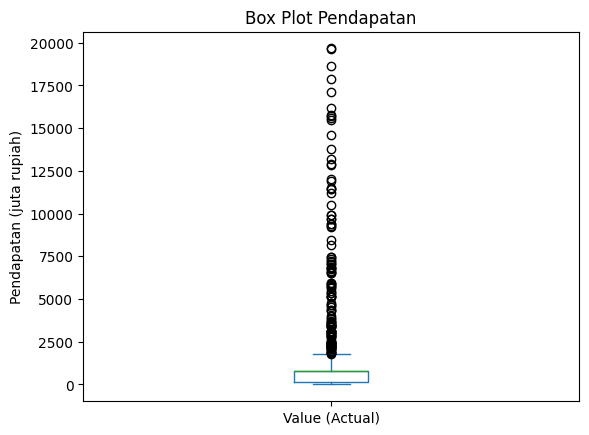

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Pilih kolom yang akan dibuat boxplot
col = 'Value (Actual)' 

# Buat boxplot
df[col].plot(kind='box')

# Tambahkan title dan label
plt.title('Box Plot Pendapatan')
plt.ylabel('Pendapatan (juta rupiah)')

# Tampilkan plot
plt.show()

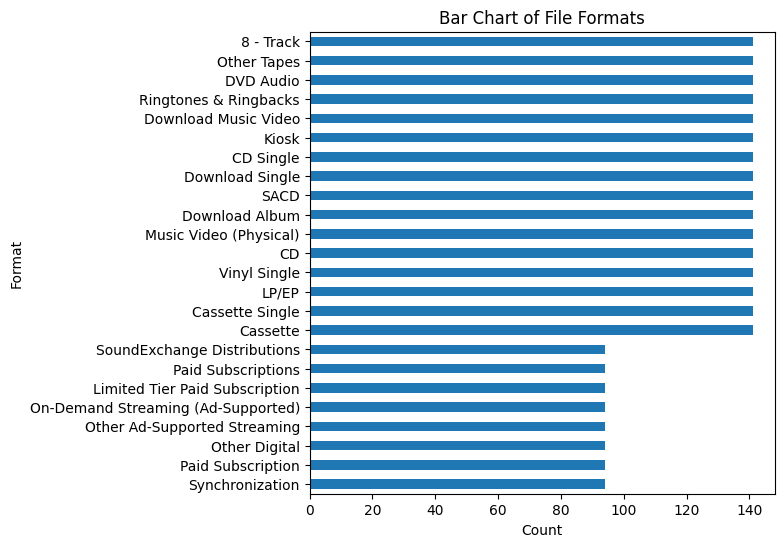

In [11]:
# Mencari nilai unique pada kolom
counts = df['Format'].value_counts()

# Sort the data by descending order
sorted_counts = counts.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(6, 6))
sorted_counts.plot(kind='barh')
plt.xlabel('Count')
plt.title('Bar Chart of File Formats')
plt.show()

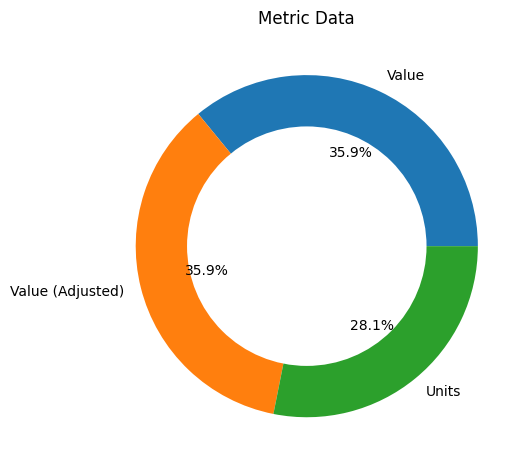

In [12]:
# Mencari nilai unique pada kolom
count = df['Metric'].value_counts()

# Buat pie chart
plt.pie(count, labels=count.index, autopct='%1.1f%%') 

# Tampilkan circle 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tampilkan
plt.title('Metric Data')
plt.tight_layout()
plt.show()

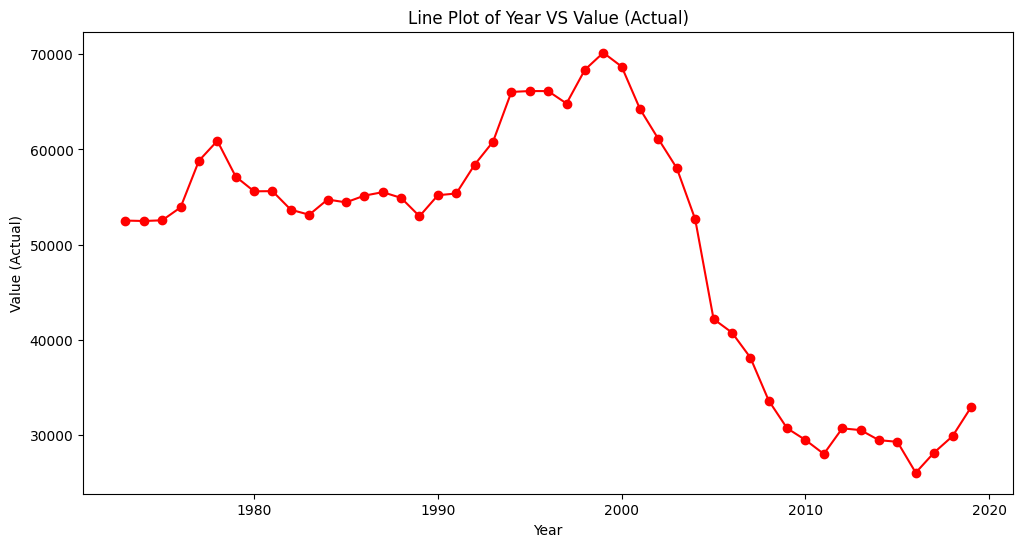

In [13]:
# Aggregasi dengan sum untuk nilai per tahun
df_grouped = df.groupby('Year').agg({'Value (Actual)':'sum'}).reset_index()

# Assuming df is your DataFrame and x and y are the column names for the variables to plot
plt.figure(figsize = (12,6))
plt.plot(df_grouped['Year'], df_grouped['Value (Actual)'], marker = 'o', linestyle= '-', color ='r')

# Set plot title and labels
plt.title('Line Plot of Year VS Value (Actual)')
plt.xlabel('Year')
plt.ylabel('Value (Actual)')

# Display the plot
plt.show()